# Classifier

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [12]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [13]:
X, y = mnist['data'],mnist['target']

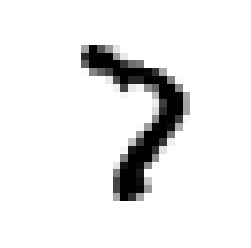

Actual Value :7.0


In [22]:
#Lets see a sample pictures
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.imshow(X[42000].reshape(28,28),cmap=plt.cm.binary)
plt.axis('off')
plt.show()
print('Actual Value :{}'.format(y[42000]))

In [23]:
# Split data in trainig set and test set 
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [26]:
# Shuffle training set data
np.random.seed(42)
suffle_index = np.random.permutation(60000)
X_train = X_train[suffle_index]
y_train = y_train[suffle_index]

In [27]:
# Let classify wether number is 5 or not
y_train_5 = (y_train == 5)

In [39]:
# no of counts for false and True value
np.bincount(y_train_5)

array([54579,  5421])

In [44]:
# SGD classifier  -- good for big dataset
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42, max_iter=1000)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [56]:
# Performance Messures
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skf = StratifiedKFold(n_splits=3, shuffle= False, random_state= 42)
for train_index, test_index in skf.split(X_train, y_train_5): 
    # print("TRAIN:", train_index, "TEST:",test_index) 
    clone_clf = clone(sgd_clf)
    clone_clf.fit(X_train[train_index], y_train_5[train_index])
    y_pred = clone_clf.predict(X_train[test_index])
    n_correct = sum(y_pred == y_train_5[test_index])
    print(n_correct/len(y_train_5[test_index]))

0.95965
0.96335
0.96765
